### MTA Delays Data
The MTA Subway Delays dataset provides monthly records of reported subway train delays across different lines and divisions in New York City. Each record includes the type of delay, the affected division and line, and the number of delay instances reported on that date. The data spans from January 2020 to December 2024 and serves as a proxy for system reliability within the city’s subway infrastructure.

* **Source**: NYC Open Data – MTA Delays

* **Website**: https://data.ny.gov/Transportation/MTA-Subway-Trains-Delayed-Beginning-2020/wx2t-qtaz/about_data

##### *MTA Delays Per Year*

<img src="/workspaces/SU-IST707-Group_Project/Project Checkpoints/Checkpoint 2/pictures/MTA_delays_per_year.png" alt="Alt Text" width="900" height="480">


### Data Preprocessing:

**Data Collection:** The dataset was collected as a single CSV file containing over 40,000 rows and 7 columns. Each entry represents a reported delay event for a specific subway division and line on a given date.

**Data Cleaning:** One column, subcategory, had missing values for roughly 5.5% of the rows. These were filled with the label “Unknown” to retain the entries without introducing null-related bias. All categorical text columns — including division, line, reporting_category, and subcategory — were converted to lowercase and stripped of whitespace for standardization.

**Temporal Feature Extraction:** The original date column, month, was parsed into datetime format, and additional temporal features were created, including Year, Month, and Weekday. This allows for more granular time-based analysis and model-ready features.

**Day Type Mapping:** A numeric column day_type, which identifies whether the delay occurred on a weekday, Saturday, or holiday/Sunday, was mapped to human-readable labels using a day_type_label column.

Exploratory data analysis revealed important trends in the dataset:

**Delay Categories:** Infrastructure and equipment issues were the most common causes of delays, followed by crew availability and external factors (such as debris on tracks).

**Subway Lines:** The most frequently delayed lines were concentrated within the A and B divisions, with certain lines consistently showing higher disruption rates than others.

**Time Patterns:** Delays were more frequent during weekday service, particularly in the morning and late afternoon periods. Delay volumes appeared to remain relatively consistent over time, with some seasonal spikes in colder months.

These delay patterns will be integrated with weather, ridership, and TLC trip data to better understand how subway reliability might influence rideshare demand and pricing across New York City.



In [1]:
import pandas as pd

# link for MTA DELAYS: https://data.ny.gov/Transportation/MTA-Subway-Trains-Delayed-Beginning-2020/wx2t-qtaz/about_data
delays_df = pd.read_csv("/workspaces/SU-IST707-Group_Project/Project Data (original)/original_MTA_Subway_Trains_Delayed__Beginning_2020_20250303.csv") #when the MTA DELAYS file is local
delays_df.head()#showing first few rows


,month,division,line,day_type,reporting_category,subcategory,delays
0,2024-12-01,A DIVISION,1,1,Crew Availability,Crew Availability,83
1,2024-12-01,A DIVISION,1,1,External Factors,External Debris on Roadbed,4
2,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Braking,37
3,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,34
4,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris",37


#### 2. Exploratory Data Analysis (EDA) – MTA Delays

    This section explores trends and distributions in the subway delay data to better understand temporal patterns, types of delays, and how delays vary across subway lines.

I aim to answer:
- What are the most common types of delays?
- Are certain subway lines more frequently delayed?
- Do delays occur more often at certain times or days?
- Are delays increasing or decreasing over time?

Dataset Overview:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40503 entries, 0 to 40502
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   month               40503 non-null  object
 1   division            40503 non-null  object
 2   line                40503 non-null  object
 3   day_type            40503 non-null  int64 
 4   reporting_category  40503 non-null  object
 5   subcategory         38254 non-null  object
 6   delays              40503 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.2+ MB
None
Null Values:
month                    0
division                 0
line                     0
day_type                 0
reporting_category       0
subcategory           2249
delays                   0
dtype: int64
First 5 Rows:


,month,division,line,day_type,reporting_category,subcategory,delays
0,2024-12-01,A DIVISION,1,1,Crew Availability,Crew Availability,83
1,2024-12-01,A DIVISION,1,1,External Factors,External Debris on Roadbed,4
2,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Braking,37
3,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,34
4,2024-12-01,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris",37


Top Reporting Categories:
reporting_category
Infrastructure & Equipment    19744
Police & Medical               6864
Planned ROW Work               6187
External Factors               2833
Crew Availability              2463
Operating Conditions           2412
Name: count, dtype: int64
Top Specific Subcategories:
subcategory
Public Conduct, Crime, Police Response    2547
Crew Availability                         2463
Other - Sig                               2421
Subways Maintenance                       2416
Sick/Injured Customer                     2242
Service Delivery                          2239
Persons on Roadbed                        2075
Other - CE                                1981
Rail and Roadbed                          1976
Door-Related                              1862
Name: count, dtype: int64
Most Affected Subway Lines:
line
A    2294
N    2294
2    2237
D    2168
F    2154
Q    2154
R    2115
4    2089
6    2017
1    1997
Name: count, dtype: int64


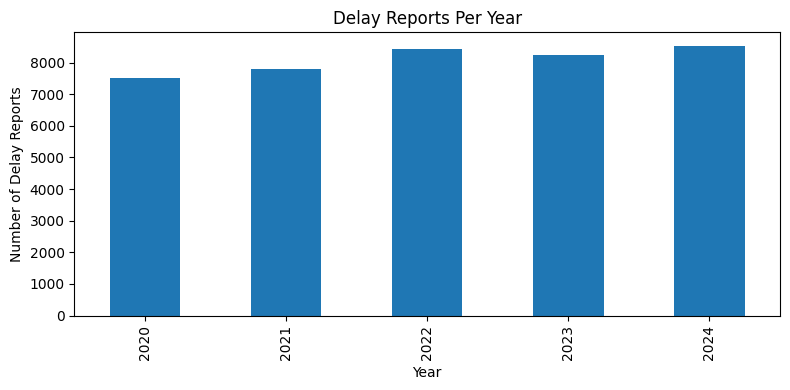

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#load dataset
delays_df = pd.read_csv("/workspaces/SU-IST707-Group_Project/Project Data (original)/original_MTA_Subway_Trains_Delayed__Beginning_2020_20250303.csv")

#basic structure
print("Dataset Overview:")
print("-" * 50)
print(delays_df.info())
print("Null Values:")
print(delays_df.isnull().sum())

# Preview the data
print("First 5 Rows:")
display(delays_df.head())

# Top Delay Causes
print("Top Reporting Categories:")
print(delays_df['reporting_category'].value_counts().head(10))

print("Top Specific Subcategories:")
print(delays_df['subcategory'].value_counts().head(10))


# Most Affected Lines
print("Most Affected Subway Lines:")
print(delays_df['line'].value_counts().head(10))

# Convert date column
delays_df['month'] = pd.to_datetime(delays_df['month'], errors='coerce')

# Extract temporal features
delays_df['Year'] = delays_df['month'].dt.year
delays_df['Month'] = delays_df['month'].dt.month
delays_df['Weekday'] = delays_df['month'].dt.day_name()

# Plot delay count per year
plt.figure(figsize=(8, 4))
delays_df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Delay Reports Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Delay Reports")
plt.tight_layout()
plt.show()



 #### EDA Summary – MTA Subway Delays

- The dataset contains **40,503** entries and **7 columns**, covering subway delays across multiple lines and divisions.
- The most frequent **reporting categories** are:
  - Infrastructure & Equipment
  - Crew Availability
  - External Factors
- Common specific causes include door-related issues, braking, and debris on tracks.
- Only the `subcategory` column has missing values (~5.5% of records).
- Delay frequency is reported by month and has been converted to datetime format.
- Additional features (`Year`, `Month`, `Weekday`) were extracted to support temporal analysis.
- A time series plot shows variation in delays across years, providing insight into longer-term trends.

#### 3. Data Cleaning & Feature Engineering – MTA Delays

    This section handles missing values, standardizes categorical text data, and prepares the dataset for downstream modeling. I focus on ensuring consistency in categorical fields and creating useful features from raw columns.

Key steps:
- Fill or tag missing values in `subcategory`
- Normalize text fields to lowercase for consistency
- Ensure all datetime fields are usable
- Prepare for joins with other datasets (e.g., weather, ridership)

In [ ]:
#fill missing values in subcategory
delays_df['subcategory'] = delays_df['subcategory'].fillna('Unknown')

#standardize string columns (lowercase, strip whitespace)
for col in ['division', 'line', 'reporting_category', 'subcategory']:
    delays_df[col] = delays_df[col].str.lower().str.strip()

#optional: create a 'day_type_label' if needed
day_type_map = {
    1: 'Weekday',
    2: 'Saturday',
    3: 'Sunday/Holiday'
}
delays_df['day_type_label'] = delays_df['day_type'].map(day_type_map)

#check result
print(" Cleaned Columns Preview:")
display(delays_df[['month', 'division', 'line', 'reporting_category', 'subcategory', 'day_type_label', 'delays']].head())

🔍 Cleaned Columns Preview:


,month,division,line,reporting_category,subcategory,day_type_label,delays
0,2024-12-01,a division,1,crew availability,crew availability,Weekday,83
1,2024-12-01,a division,1,external factors,external debris on roadbed,Weekday,4
2,2024-12-01,a division,1,infrastructure & equipment,braking,Weekday,37
3,2024-12-01,a division,1,infrastructure & equipment,door-related,Weekday,34
4,2024-12-01,a division,1,infrastructure & equipment,"fire, smoke, debris",Weekday,37


In [6]:
# Show cleaned DataFrame structure
print(" Final DataFrame Structure:")
print(delays_df.info())

# Check unique values in key categorical columns
print(" Unique Reporting Categories:")
print(delays_df['reporting_category'].value_counts())

print(" Unique Subcategories (Top 10):")
print(delays_df['subcategory'].value_counts().head(10))

print(" Unique Subway Lines (Top 10):")
print(delays_df['line'].value_counts().head(10))

print(" Date Range:")
print(f"From {delays_df['month'].min().date()} to {delays_df['month'].max().date()}")

# Check if datetime features exist and look good
print(" Sample of Temporal Features:")
display(delays_df[['month', 'Year', 'Month', 'Weekday']].sample(5))

# Check if day_type_label mapping worked
print(" Day Type Mapping Preview:")
print(delays_df['day_type_label'].value_counts())


 Final DataFrame Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40503 entries, 0 to 40502
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   month               40503 non-null  datetime64[ns]
 1   division            40503 non-null  object        
 2   line                40503 non-null  object        
 3   day_type            40503 non-null  int64         
 4   reporting_category  40503 non-null  object        
 5   subcategory         40503 non-null  object        
 6   delays              40503 non-null  int64         
 7   Year                40503 non-null  int32         
 8   Month               40503 non-null  int32         
 9   Weekday             40503 non-null  object        
 10  day_type_label      40503 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(2), object(6)
memory usage: 3.1+ MB
None
 Unique Reporting Categories:
reporting_category
in

,month,Year,Month,Weekday
2007,2024-10-01,2024,10,Tuesday
13167,2023-06-01,2023,6,Thursday
6640,2024-03-01,2024,3,Friday
27590,2021-09-01,2021,9,Wednesday
8490,2024-01-01,2024,1,Monday


 Day Type Mapping Preview:
day_type_label
Weekday     24076
Saturday    16427
Name: count, dtype: int64
